# Part 2: Climate Change—Temperatures and Precipitation

In this project, you will investigate data on climate change, or the long-term shifts in temperatures and weather patterns!

In [1]:
pip install datascience

In [3]:

import numpy as np
import pandas as pd
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')


## Part 1: Temperatures

In the following analysis, we will investigate one of the 21st century's most prominent issues: climate change. While the details of climate science are beyond the scope of this course, we can start to learn about climate change just by analyzing public records of different cities' temperature and precipitation over time.

We will analyze a collection of historical daily temperature and precipitation measurements from weather stations in 210 U.S. cities. The dataset was compiled by Yuchuan Lai and David Dzombak [1]; a description of the data from the original authors and the data itself is available [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488). 

[1] Lai, Yuchuan; Dzombak, David (2019): Compiled historical daily temperature and precipitation data for selected 210 U.S. cities. Carnegie Mellon University. Dataset.

### Part 1, Section 1: Cities

Load the file "city_info.csv' to load information about the `cities` and preview the first few rows.

In [4]:
cities = pd.read_csv('city_info.csv')
cities.head(3)

,Unnamed: 0,Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate
0,1,Lander,USW00024021,42.8153,-108.7261,LANDER WBO,1892-01-01,5/28/1946
1,2,Lander,USW00024021,42.8153,-108.7261,LANDER HUNT FIELD,5/29/1946,12/31/2021
2,3,Cheyenne,USW00024018,41.1519,-104.8061,CHEYENNE WBO,1871-01-01,8/31/1935


The `cities` table has one row per weather station and the following columns:

1. `"Name"`: The name of the US city
2. `"ID"`: The unique identifier for the US city
3. `"Lat"`: The latitude of the US city (measured in degrees of latitude)
4. `"Lon"`: The longitude of the US city (measured in degrees of longitude)
4. `"Stn.Name"`: The name of the weather station in which the data was collected
5. `"Stn.stDate"`: A string representing the date of the first recording at that particular station
6. `"Stn.edDate"`: A string representing the date of the last recording at that particular station

The data lists the weather stations at which temperature and precipitation data were collected. Note that although some cities have multiple weather stations, only one is collecting data for that city at any given point in time. Thus, we are able to just focus on the cities themselves.

**Question 1.1.1:** In the cell below, produce a scatter plot that plots the latitude and longitude of every city in the `cities` table so that the result places northern cities at the top and western cities at the left.

*Note*: It's okay to plot the same point multiple times!


These cities are all within the continental U.S., and so the general shape of the U.S. should be visible in your plot. The shape will appear distorted compared to most maps for two reasons: the scatter plot is square even though the U.S. is wider than it is tall, and this scatter plot is an [equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection) of the spherical Earth. A geographical map of the same data uses the common [Pseudo-Mercator projection](https://en.wikipedia.org/wiki/Web_Mercator_projection).

In [5]:

citieslist = Table.read_table('city_info.csv', index_col=0)
Marker.map_table(citieslist.select('Lat', 'Lon', 'Name').relabeled('Name', 'labels'))

Question 1.1.2 Does it appear that these city locations are sampled uniformly at random from all the locations in the U.S.? Why or why not?

In [6]:
#From what I can tell, there are more plots in areas that consist of more cities, which does not make this sampled uniformly at random from all the locations in the US. 

**Question 1.1.3:** Assign `num_unique_cities` to the number of unique cities that appear in the `cities` table.

In [7]:
cities_df = pd.read_csv('city_info.csv')
num_unique_cities = cities['Name'].nunique()


# Do not change this line
print(f"There are {num_unique_cities} unique cities that appear within our dataset.")

There are 210 unique cities that appear within our dataset.


In order to investigate further, it will be helpful to determine what region of the United States each city was located in: Northeast, Northwest, Southeast, or Southwest. For our purposes, we will be using the following geographical boundaries:

<img src= "usa_coordinates.png" alt="USA Coordinate Map" width="600"/>

1. A station is located in the `"Northeast"` region if its latitude is above or equal to 40 degrees and its longtitude is greater than or equal to -100 degrees.
2. A station is located in the `"Northwest"` region if its latitude is above or equal to 40 degrees and its longtitude is less than -100 degrees.
3. A station is located in the `"Southeast"` region if its latitude is below 40 degrees and its longtitude is greater than or equal to -100 degrees.
4. A station is located in the `"Southwest"` region if its latitude is below 40 degrees and its longtitude is less than -100 degrees.

**Question 1.1.4**: Define the `coordinates_to_region` function below. It should take in two arguments, a city's latitude (`lat`) and longitude (`lon`) coordinates, and output a string representing the region it is located in.

In [8]:
def coordinates_to_region(lat, lon):
    if lat >= 40 and lon >= -100:
        return "Northeast"
    elif lat >= 40 and lon < -100:
        return "Northwest"
    elif lat < 40 and lon >= -100:
        return "Southeast"
    else:
        return "Southwest"

**Question 1.1.5**: Add a new column in `cities` labeled `Region` that contains the region in which the city is located. For full credit, you must use the `coordinates_to_region` function you defined rather than reimplementing its logic.

In [9]:

cities_df['Region'] = cities_df.apply(lambda row: coordinates_to_region(row['Lat'], row['Lon']), axis = 1)
cities_df.head(5) # this should show the new column

,Unnamed: 0,Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate,Region
0,1,Lander,USW00024021,42.8153,-108.7261,LANDER WBO,1892-01-01,5/28/1946,Northwest
1,2,Lander,USW00024021,42.8153,-108.7261,LANDER HUNT FIELD,5/29/1946,12/31/2021,Northwest
2,3,Cheyenne,USW00024018,41.1519,-104.8061,CHEYENNE WBO,1871-01-01,8/31/1935,Northwest
3,4,Cheyenne,USW00024018,41.1519,-104.8061,CHEYENNE MUNICIPAL ARPT,9/1/1935,12/31/2021,Northwest
4,5,Wausau,USW00014897,44.9258,-89.6256,Wausau Record Herald,1896-01-01,12/31/1941,Northeast


To confirm that you've defined your `coordinates_to_region` function correctly and successfully added the `Region` column to the `cities` table, run the following cell. Each region should have a different color in the result.

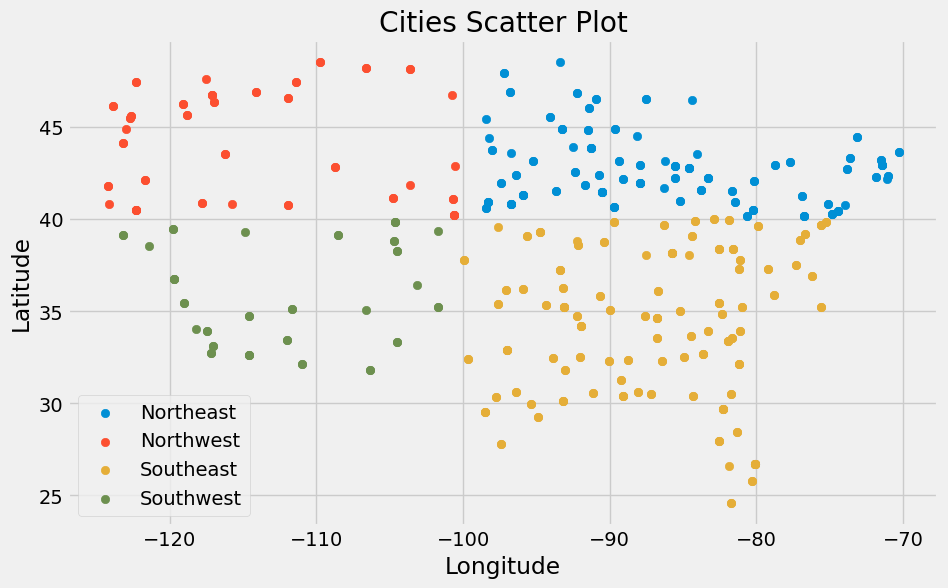

In [10]:


plt.figure(figsize=(10, 6))
for region, region_df in cities_df.groupby('Region'):
    plt.scatter(region_df['Lon'], region_df['Lat'], label=region)

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cities Scatter Plot')
plt.legend()
plt.show()

### Part 1, Section 2: Welcome to Phoenix, Arizona

Each city has a different CSV file full of daily temperature and precipitation measurements. The file for Phoenix, Arizona is included with this project as `phoenix.csv`. The files for other cities can be downloaded [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488) by matching them to the ID of the city in the `cities` table.

Since Phoenix is located on the upper edge of the Sonoran Desert, it has some impressive temperatures.

Load in the `phoenix` table. It has one row per day and the following columns:

1. `"Date"`: The date (a string) representing the date of the recording in **YYYY-MM-DD** format
2. `"tmax"`: The maximum temperature for the  day (°F)
3. `"tmin"`: The minimum temperature for the day (°F)
4. `"prcp"`: The recorded precipitation for the day (inches)

In [25]:
#load phoenix table into variable 'phoenix'
phoenix = Table.read_table('phoenix.csv')
phoenix.show(10)

Unnamed: 0,Date,tmax,tmin,prcp
1,1896-01-01,66,30,0
2,1896-01-02,64,30,0
3,1896-01-03,68,30,0
4,1896-01-04,69,34,0
5,1896-01-05,70,46,0
6,1896-01-06,67,34,0
7,1896-01-07,71,30,0
8,1896-01-08,72,35,0
9,1896-01-09,78,35,0
10,1896-01-10,72,41,0


**Question 1.2.1:** Assign the variable `largest_2010_range_date` to the date of the **largest temperature range** in Phoenix, Arizona for any day between January 1st, 2010 and December 31st, 2010. Your answer should be a string in the "YYYY-MM-DD" format. Feel free to use as many lines as you need. A temperature range is calculated as the difference between the max and min temperatures for the day.

*Hint*: To limit the values in a column to only those that *contain* a certain string, pick the right `are.` predicate from the [Python Reference Sheet](http://data8.org/sp22/python-reference.html).

*Note:*  please use the `phoenix_with_ranges_2010` variable.

In [26]:
phoenix = phoenix.drop('Unnamed: 0')
phoenix_with_ranges_2010 = phoenix.where('Date', are.contained_in(make_array('2010-01-01', '2010-12-31')))
temperature_ranges = phoenix_with_ranges_2010.column('tmax') - phoenix_with_ranges_2010.column('tmin')
largest_range_index = np.argmax(temperature_ranges)
largest_2010_range_date = phoenix_with_ranges_2010.column('Date').item(largest_range_index)

temperature_ranges
largest_range_index
largest_2010_range_date



'2010-01-01'

We can look back to our `phoenix` table to check the temperature readings for our `largest_2010_range_date` to see if anything special is going on. Run the cell below to find the row of the `phoenix` table that corresponds to the date we found above. 

In [27]:
# Just run this cell
phoenix.where("Date", largest_2010_range_date)

Date,tmax,tmin,prcp
2010-01-01,68,41,0


 Look at the maximum temperature for that day. That's hot.

The function extract_year_from_date takes a date string in the YYYY-MM-DD format and returns an integer representing the year. The function extract_month_from_date takes a date string and returns a string describing the month. Run this cell, but you do not need to understand how this code works or edit it.

In [28]:
# Just run this cell
import calendar

def extract_year_from_date(date):
    """Returns an integer corresponding to the year of the input string's date."""
    return int(date[:4])

def extract_month_from_date(date):
    "Return an abbreviation of the name of the month for a string's date."
    month = date[5:7]
    return f'{month} ({calendar.month_abbr[int(date[5:7])]})'


# Example
print('2022-04-01 has year', extract_year_from_date('2022-04-01'),
      'and month', extract_month_from_date('2022-04-01'))

2022-04-01 has year 2022 and month 04 (Apr)


**Question 1.2.2:** Add two new columns called `Year` and `Month` to the `phoenix` table that contain the year as an **integer** and the month as a **string** (such as `"04 (Apr)"`) for each day, respectively. 

*Note*: The functions above may be helpful!

In [29]:
phoenix = phoenix.with_columns("Year", phoenix.apply(lambda date: int(date.split("-")[0]), "Date"), "Month", phoenix.apply(lambda date: date.split("-")[1], "Date"))
phoenix.show(10)

Date,tmax,tmin,prcp,Year,Month
1896-01-01,66,30,0,1896,01
1896-01-02,64,30,0,1896,01
1896-01-03,68,30,0,1896,01
1896-01-04,69,34,0,1896,01
1896-01-05,70,46,0,1896,01
1896-01-06,67,34,0,1896,01
1896-01-07,71,30,0,1896,01
1896-01-08,72,35,0,1896,01
1896-01-09,78,35,0,1896,01
1896-01-10,72,41,0,1896,01


**Question 1.2.3:** Using the `phoenix` table, create an overlaid line plot of the **average maximum temperature** and **average minimum temperature** for each year between 1900 and 2020 (inclusive). 



<Figure size 1000x600 with 0 Axes>

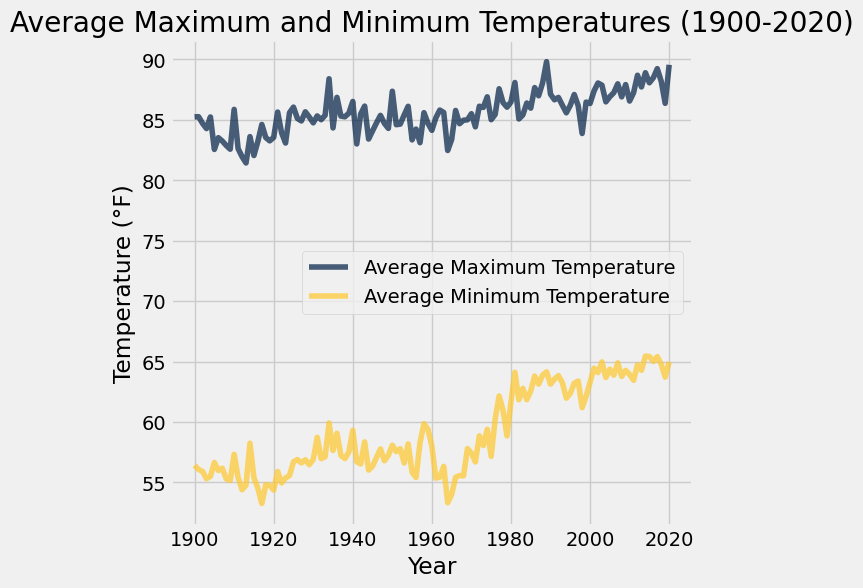

In [30]:
phoenix['Year'] = [int(date.split('-')[0]) for date in phoenix['Date']]
phoenix_years = phoenix.where('Year', are.between_or_equal_to(1900, 2020))
average_temperature = phoenix_years.group('Year', np.mean)

plt.figure(figsize = (10, 6))
average_temperature.plot('Year', select = ['tmax mean', 'tmin mean'], overlay = True)
plt.title('Average Maximum and Minimum Temperatures (1900-2020)')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend(['Average Maximum Temperature', 'Average Minimum Temperature'])
plt.show()

**Question 1.2.4:** Although still hotly debated (pun intended), many climate scientists agree that the effects of climate change began to surface in the early 1960s as a result of elevated levels of greenhouse gas emissions. How does the graph you produced in Question 1.2.3 support the claim that modern-day global warming began in the early 1960s? 

In [31]:
#Some of the things that can support the claim of global warming beginning in the early 1960s is the consistent temperature increases after 1960 and the sizable gap between temperatures before 1960 and temperatures after 1960. Because the tempratures never go back to the levels prior to 1960, this further supports the claim that global warming began during this time. 

Averaging temperatures across an entire year can obscure some effects of climate change. For example, if summers get hotter but winters get colder, the annual average may not change much. Let's investigate how average **monthly** maximum temperatures have changed over time in Phoenix. 

**Question 1.2.5:** Create a `monthly_increases` table with one row per month and the following four columns in order: 
1. `"Month"`: The month (such as `"02 (Feb)"`)
2. `"Past"`: The average max temperature in that month from 1900-1960 (inclusive)
3. `"Present"`: The average max temperature in that month from 2019-2021 (inclusive)
4. `"Increase"`: The difference between the present and past average max temperatures in that month

First make a copy of the `phoenix` table and add a new column containing the corresponding **period** for each row. You may find the `period` function helpful. Then, use this new table to construct `monthly_increases`. Feel free to use as many lines as you need.

*Hint*: What method can we use to get each **unique value** as its own column? 

*Note*: Please do **not** re-assign the `phoenix` variable!


In [34]:
def period(year):
    if 1900 <= year <= 1960:
        return "Past"
    elif 2019 <= year <= 2021:
        return "Present"
    else:
        return "Other"

phoenix_copy = phoenix.copy()
phoenix_copy['Period'] = [period(year) for year in phoenix_copy['Year']]

grouped_max_temps = phoenix_copy.group(['Month', 'Period'], np.mean).select(['Month', 'Period', 'tmax mean']).relabeled('tmax mean', 'Max Temp')

monthly_max_temps = grouped_max_temps.pivot('Period', 'Month', values='Max Temp', collect=np.mean)

monthly_max_temps['Increase'] = monthly_max_temps['Present'] - monthly_max_temps['Past']

format_month = np.vectorize(lambda m: f"{int(m):02d} ({calendar.month_abbr[int(m)]})" if m.isdigit() else m)
monthly_max_temps['Month'] = format_month(monthly_max_temps['Month'])

monthly_increases = monthly_max_temps.select(['Month', 'Past', 'Present', 'Increase'])
monthly_increases


Month,Past,Present,Increase
01 (Jan),65.0164,67.8312,2.81479
02 (Feb),68.8485,69.1859,0.337362
03 (Mar),74.6499,75.9796,1.32965
04 (Apr),82.6421,88.4,5.75792
05 (May),91.4299,94.571,3.14104
06 (Jun),101.166,105.734,4.56832
07 (Jul),103.599,107.245,3.64654
08 (Aug),101.416,107.384,5.96769
09 (Sep),97.6874,101.238,3.55035
10 (Oct),86.798,90.1667,3.36868


# Part 2: Drought

According to the [United States Environmental Protection Agency](https://www.epa.gov/climate-indicators/southwest), "Large portions of the Southwest have experienced drought conditions since weekly Drought Monitor records began in 2000. For extended periods from 2002 to 2005 and from 2012 to 2020, nearly the entire region was abnormally dry or even drier." 

Assessing the impact of drought is challenging with just city-level data because so much of the water that people use is transported from elsewhere, but we'll explore the data we have and see what we can learn.

Let's first take a look at the precipitation data in the Southwest region. The `southwest.csv` file contains total annual precipitation for 13 cities in the southwestern United States for each year from 1960 to 2021. This dataset is aggregated from the daily data and includes only the Southwest cities from the original dataset that have consistent precipitation records back to 1960.

Read the file "southwest.csv"

In [51]:
# read the file in
southwest = pd.read_csv("southwest.csv")

**Question 2.1.** Create a table `totals` that has one row for each year in chronological order. It should contain the following columns:
1. `"Year"`: The year (a number)
2. `"Precipitation"`: The total precipitation in all 13 southwestern cities that year


Plot the total precipitation in these cities over time, so that we can try to spot the drought visually. As a reminder, the drought years given by the EPA were  (2002-2005) and (2012-2020).

Index(['City', 'Year', 'Total Precipitation'], dtype='object')


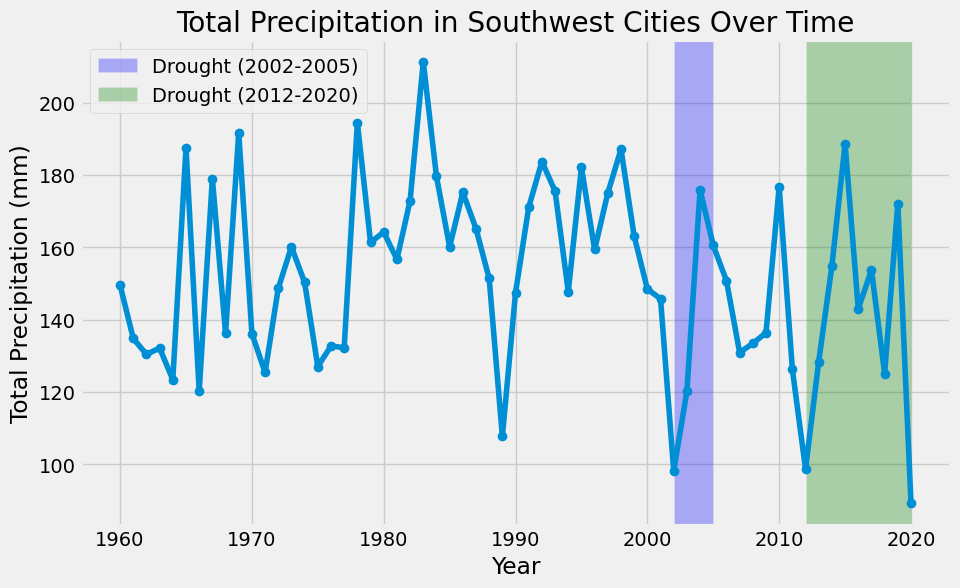

In [52]:
print(southwest.columns)
southwest['Year'] = pd.to_datetime(southwest['Year'], format='%Y')
totals = southwest.groupby(southwest['Year'].dt.year)['Total Precipitation'].sum().reset_index()
plt.figure(figsize = (10, 6))
plt.plot(totals['Year'], totals['Total Precipitation'], marker = 'o', linestyle = '-')
plt.title('Total Precipitation in Southwest Cities Over Time')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True)

plt.axvspan(2002, 2005, facecolor = 'blue', alpha = 0.3, label = 'Drought (2002-2005)')
plt.axvspan(2012, 2020, facecolor = 'green', alpha = 0.3, label = 'Drought (2012-2020)')

plt.legend()
plt.show()


This `drought_label` function distinguishes between drought years as described in the U.S. EPA statement above (2002-2005 and 2012-2020) and other years. Note that the label "other" is perhaps misleading, since there were other droughts before 2000, such as the massive [1988 drought](https://en.wikipedia.org/wiki/1988%E2%80%9390_North_American_drought) that affected much of the U.S. However, if we're interested in whether these modern drought periods (2002-2005 and 2012-2020) are *normal* or *abnormal*, it makes sense to distinguish the years in this way. 

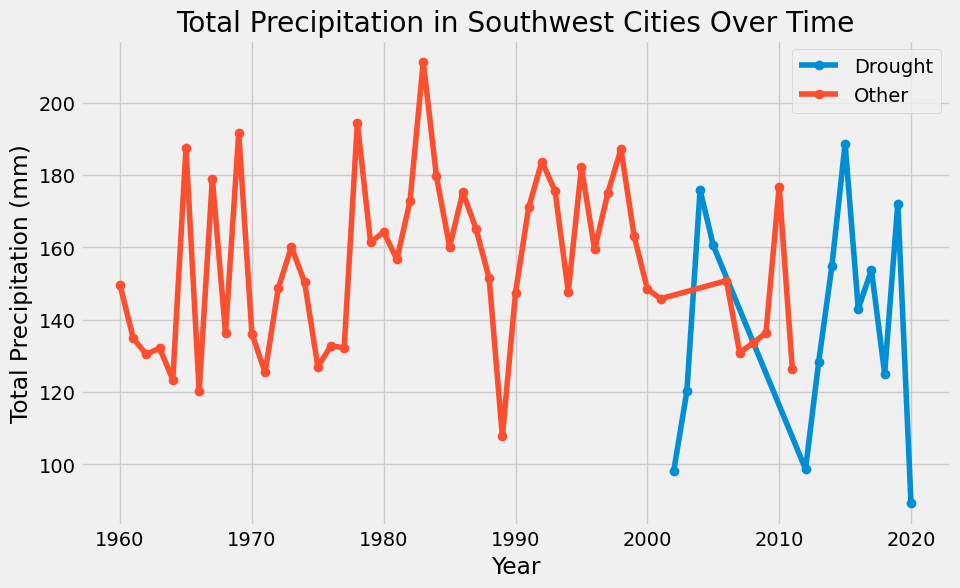

In [54]:
def drought_label(year):
    """Return whether a year is in a drought period according to the U.S. EPA."""
    if year in range(2002, 2006) or year in range(2012, 2021):
        return 'Drought'
    else:
        return 'Other'

# Apply the drought_label function to each year and add the labels as a new column
totals['Drought Period'] = totals['Year'].apply(drought_label)

# Plot the total precipitation in these cities over time, with different colors for drought and non-drought years
plt.figure(figsize = (10, 6))
for label, df in totals.groupby('Drought Period'):
    plt.plot(df['Year'], df['Total Precipitation'], marker='o', linestyle='-', label=label)

plt.title('Total Precipitation in Southwest Cities Over Time')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True)
plt.legend()
plt.show()


**Question 2.2.** Define the table `drought`. It should contain one row per year and the following two columns:
- `"Label"`: Denotes if a year is part of a `"drought"` year or an `"other"` year
- `"Precipitation"`: The sum of the total precipitation in 13 Southwest cities that year

Then, construct an overlaid histogram of two observed distributions: the total precipitation in drought years and the total precipitation in other years. 

*Note*: Use the provided `bins` when creating your histogram, and do not re-assign the `southwest` table. Feel free to use as many lines as you need!



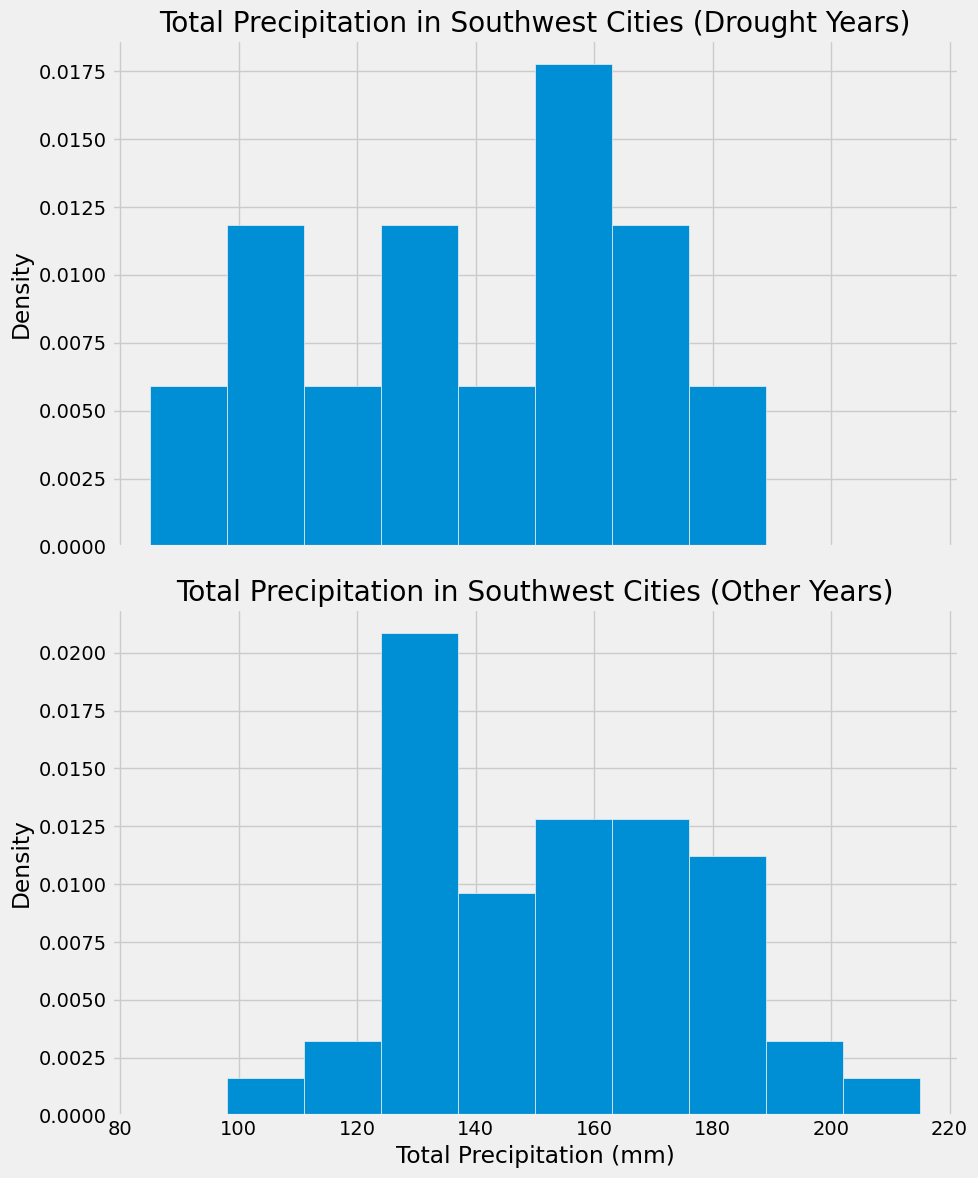

In [56]:

# Define bins
bins = np.arange(85, 215+1, 13)

# Group the data by year and label, summing up the total precipitation
drought = (totals.assign(Label=np.where(((totals['Year'] >= 2002) & (totals['Year'] <= 2005)) | ((totals['Year'] >= 2012) & (totals['Year'] <= 2020)), 'Drought', 'Other'))
           .groupby(['Year', 'Label'])['Total Precipitation'].sum().reset_index())

# Plot the histograms
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

for i, (label, df) in enumerate(drought.groupby('Label')):
    df.hist(column="Total Precipitation", bins=bins, density=True, stacked=True, ax=axes[i])
    axes[i].set_title(f"Total Precipitation in Southwest Cities ({label} Years)")
    axes[i].set_ylabel("Density")

plt.xlabel("Total Precipitation (mm)")
plt.tight_layout()
plt.show()
